# <font color='red'>WORDCLOUD FOR A SURVEY CONDUCTED</font>

## Importing Required Libraries

Capturing error during importing and importing it

        import sys
        try:
            import stopwords
        except ModuleNotFoundError as e:
            missing_module = str(e).split("'")[1]  **Extract the missing module name from the error message**
            !pip install missing_module

In [1]:
import string
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

## Importing the data

In [2]:
# This is where you load your data, this notebook can be used as a template
df = pd.read_excel("words.xlsx")

### Checking the data

In [3]:
df.head()

,Feedback
0,Use of supplements should be included in post-...
1,I believe this is a noble idea which everyone ...
2,None
3,None
4,The proposed premium should take into account ...


### Converting the targeted column into a list

In [4]:
survey_words = df["Feedback"].to_list()
unclean_words = survey_words.copy()

### Removing puctuations from the list

        punctuations = ['.', ',', ';', ':', '?', '!', '–', '—', 
                        '...', '(', ')', '[', ']', '{', '}', '<', 
                        '>', '#', '&', '^', '*']

In [5]:
# Define the punctuation symbols you want to remove
punctuation_to_remove = '.,;:?!–—...()[]{}<>#&^*'+string.punctuation

# Create a translation table using a dictionary
translator = str.maketrans({ord(punc): None for punc in punctuation_to_remove})

# removing the punctuations from my unclean words
clean_words = [word.translate(translator) for word in unclean_words]

# printing our clean_words to check the words if they have any puctuations from an eyeballing angle
clean_words[:10] # the first 10

['Use of supplements should be included in postretirement medical benefits  ',
 'I believe this is a noble idea which everyone going to employment should take in the event one changes jobs they should be allowed to continue with remitting funds towards this scheme',
 'None',
 'None',
 'The proposed premium should take into account the reducing income in light of taxeslevies and high cost of living ',
 'It is very essential given that at the retirement age most people require medical assistance often',
 'None',
 'None',
 'eliminate optical and dental increase inpatient',
 'None']

### plotting a Word Cloud

In [9]:
word_string = clean_words.copy()
word_string = ' '.join(clean_words)

In [10]:
# Defining the punctuation symbols to remove
punctuation_to_remove = '.,;:?!–—...()[]{}<>#&^*'+string.punctuation

# Creating a translation table using a dictionary
translator = str.maketrans({ord(punc): None for punc in punctuation_to_remove})

# Defining the custom stopwords
custom_stopwords = {"none", "will", "my", "take", "one", "may", "wish", "please", "give", "help"}
STOPWORDS.update(custom_stopwords)

# Cleaning the word_string by removing punctuation
word_string = ' '.join([word.translate(translator) for word in word_string.split()])

# Removing the common stopwords and adding custom stopwords to the STOPWORDS set
for word in word_string.split():
    if word.lower() in STOPWORDS:
        STOPWORDS.add(word)

# Creating a WordCloud object
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=300)
wordcloud.generate(word_string)

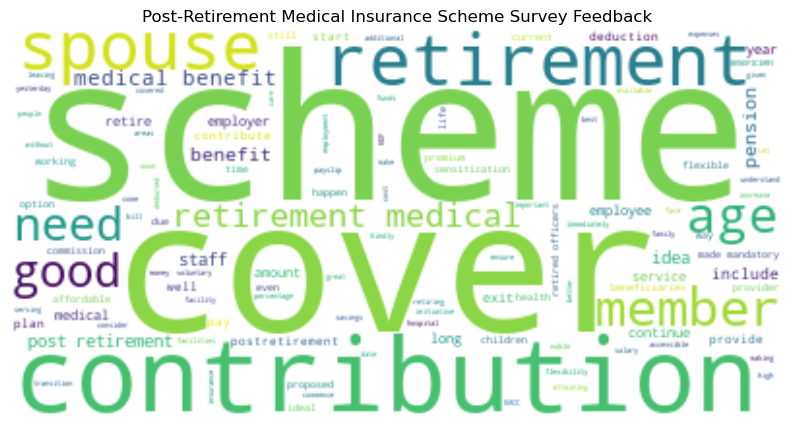

In [11]:
plt.figure(figsize=(10,10))
plt.clf()
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Post-Retirement Medical Insurance Scheme Survey Feedback")
plt.axis('off')
plt.show()

# <font color='red'>USING DEFAULT COLOR</font>

Click [here](https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html) for the documentation

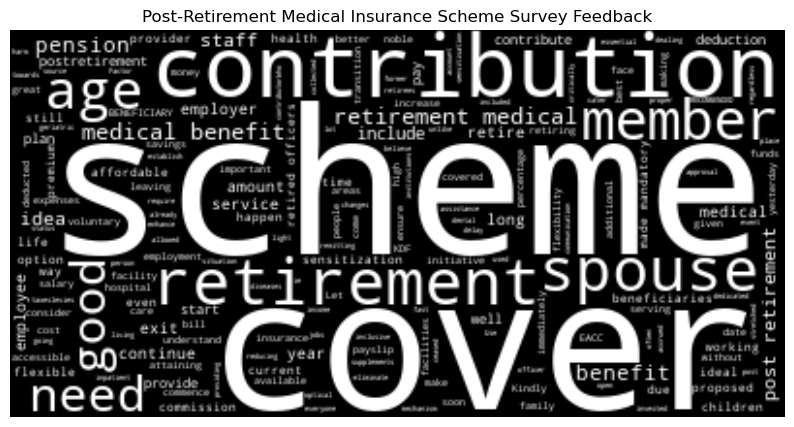

In [13]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(100, 200)

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=200).generate(word_string)
wordcloud.recolor(color_func=grey_color_func, random_state=3)

default_colors = wordcloud.to_array()

plt.figure(figsize=(10,10))
plt.clf()
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=10), interpolation='bilinear')
plt.title("Post-Retirement Medical Insurance Scheme Survey Feedback")
plt.axis('off')
plt.show()

### Creating a custom mask to use the wordcloud with

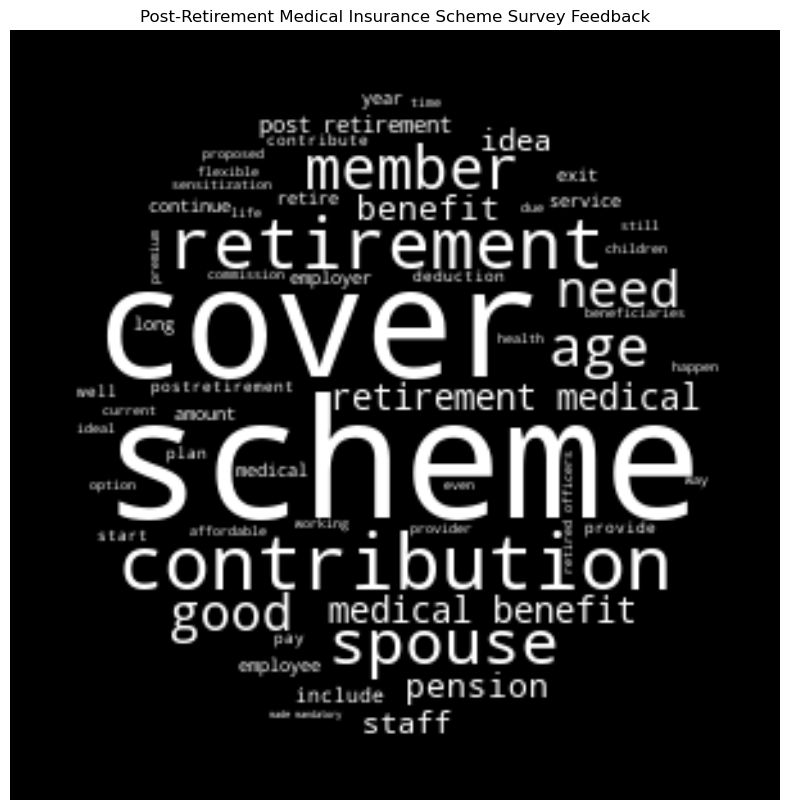

In [14]:
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=200, mask=mask).generate(word_string)
wordcloud.recolor(color_func=grey_color_func, random_state=3)

default_colors = wordcloud.to_array()

plt.figure(figsize=(10,10))
plt.clf()
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=10), interpolation='bilinear')
plt.title("Post-Retirement Medical Insurance Scheme Survey Feedback")
plt.axis('off')
plt.savefig("survey.jpg", format='png')
plt.show()
plt.close()